In [1]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [2]:
class LinearRegression:
    """
    A class which implements linear regression model with gradient descent.
    """

    def __init__(self, lr=0.01, epochs=10000):
        self.lr = lr
        self.epochs = epochs
        self.parameters = {"W": None, "b": None}
        self.loss = []

    @staticmethod
    def _mean_squared_error(y, y_hat):
        """
        Private method, used to evaluate loss at each iteration.
        Args:
            y : np.array, labels
            y_hat : np.array, predicted values

        Returns:
            error : float

        """
        m = y_hat.shape[0]
        error = np.mean(np.square(y_hat - y))
        return error
        
    def fit(self, X, y, optimizer="gradient descent", beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        Used to calculate the coefficient of the linear regression model.
        Args:
            X : np.array, features
            y : np.array, labels
            optimizer : string. Gradient Descent or Adam
            beta1 : Adam's coefficient
            beta2 : Adam's coefficient
            epsilon : hedging against division by zero.

        Returns:
            None
        """
        # 1. Initialize weights and bias to zeros
        m = X.shape[0]
        self.parameters["W"], self.parameters["b"] = np.zeros((X.shape[1], 1)), np.zeros(1)
        grads = {}
        v, s, v_correct, s_correct = {}, {}, {}, {}
        t = 0
        v["dW"], v["db"] = np.zeros(self.parameters["W"].shape), np.zeros(self.parameters["b"].shape)
        s["dW"], s["db"] = np.zeros(self.parameters["W"].shape), np.zeros(self.parameters["b"].shape)

        # 2. Perform gradient descent
        for i in range(self.epochs):

            # Line equation
            y_hat = np.dot(X, self.parameters["W"]) + self.parameters["b"]
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)

            # Calculate derivatives
            grads["dW"] = 1 / m * 2 * np.dot(X.T, (y_hat - y))
            grads["db"] = 1 / m * 2 * np.sum(y_hat - y)

            # Update the coefficients
            if optimizer == "gradient descent":
                for key, d_key in zip(["W", "b"], ["dW", "db"]):
                    self.parameters[key] -= self.lr * grads[d_key]
            if optimizer == "adam":
                t += 1
                for key, d_key in zip(["W", "b"], ["dW", "db"]):
                    v[d_key] = beta1 * v[d_key] + (1 - beta1) * grads[d_key]
                    s[d_key] = beta2 * s[d_key] + (1 - beta2) * np.square(grads[d_key])
                    v_correct[d_key] = v[d_key] / (1 - np.power(beta1, t))
                    s_correct[d_key] = s[d_key] / (1 - np.power(beta2, t))
                    self.parameters[key] -= self.lr * v_correct[d_key] / (np.sqrt(s_correct[d_key]) + epsilon)

    def predict(self, X):
        """
        Makes predictions using the line equation.
        Args:
            X : array, features

        Returns:
            array, predictions
        """
        W, b = self.parameters["W"], self.parameters["b"]
        return np.dot(X, W) + b

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(lr=0.05)
model.fit(X_train, y_train, optimizer="adam")
preds = model.predict(X_test)

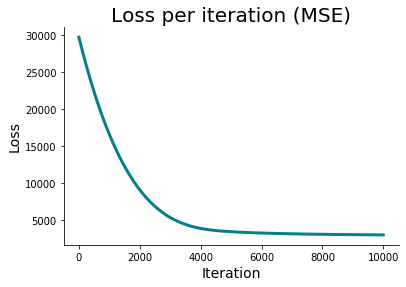

In [5]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

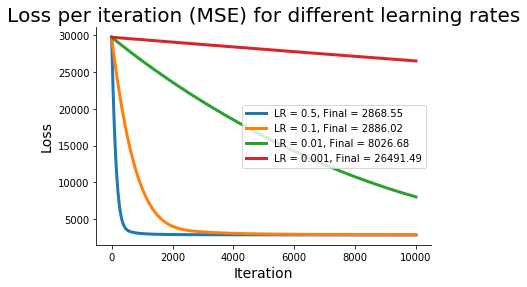

In [6]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(lr=lr)
    model.fit(X_train, y_train, optimizer="adam")
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
plt.title('Loss per iteration (MSE) for different learning rates', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

In [7]:
model = LinearRegression(lr=0.5)
model.fit(X_train, y_train, optimizer="adam")
preds = model.predict(X_test)

model._mean_squared_error(y_test, preds)

2900.169528424409

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

mean_squared_error(y_test, lr_preds)

2900.1732878832318